In [73]:
from crismy.crismy import CRISM
from crismy.utils import utils
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from ipywidgets import *
%matplotlib inline
from sklearn.linear_model import LassoLarsCV, LassoLarsIC, Lasso, Lars, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import svm

In [2]:
f = '/Users/andrew/Dropbox/Planetary/CRISM_Project/crism_data/hsp00017ba0_01_if218l_trr3.img'
hsp = CRISM.open(f)

In [3]:
hsp.bands, hsp.lines, hsp.samples

(154, 2700, 64)

In [4]:
hsp.data[120, 0:40, 3:-1].shape

(40, 60)

In [5]:
plt.rcParams['figure.figsize'] = [10, 10]
utils.plot_widget_Gray(hsp, 120, x=slice(0,40), use_selector=True)

interactive(children=(BoundedIntText(value=120, description='R', max=154), Output()), _dom_classes=('widget-in…

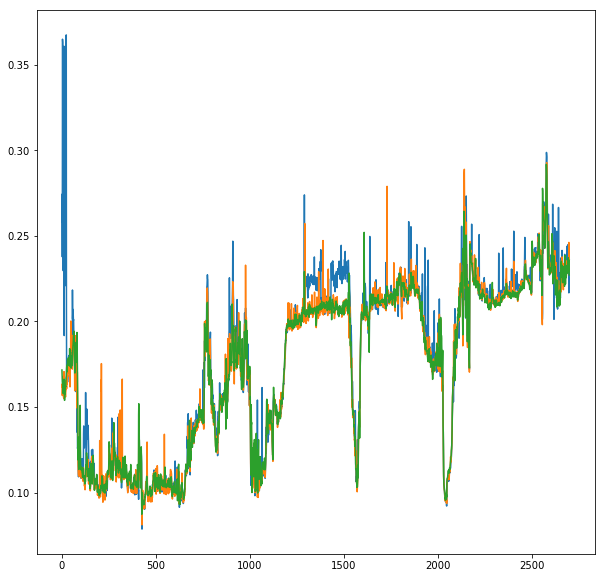

In [6]:
plt.plot(hsp.data[120,:,53:56])

In [7]:
hsp.lines

2700

In [363]:
def get_columns_and_indexes(columns=slice(53,54), band=120):
    d = hsp.data[:,:,3:-1][band,:,columns]
    rows, cols = d.shape
    x = np.arange(rows)
    X = np.tile(x, cols)
    return X.reshape(-1, 1), d.flatten()

def get_rows_and_indexes(rows=slice(0,1), band=120):
    d = hsp.data[band,rows,3:-1]
    rows, cols = d.shape
    x = np.arange(cols)
    X = np.tile(x, rows)
    return X.reshape(-1, 1), d.flatten()

In [83]:
[x.shape for x in get_columns_and_indexes()]

[(2700, 1), (2700,)]

In [84]:
[x.shape for x in get_rows_and_indexes(rows=slice(0,2))]

[(120, 1), (120,)]

In [85]:
def fit_model(X, y, poly=3, model=Lasso()):
    model1 = model
    XX = PolynomialFeatures(poly).fit_transform(X.reshape(-1,1))
    model1.fit(XX, y)
    plt.plot(y, '-x')
    plt.plot(model1.predict(np.arange(len(hsp.lines)), '-o'))
    plt.title(f'Poly {poly}, model:{model}')

# using Lasso 1 band

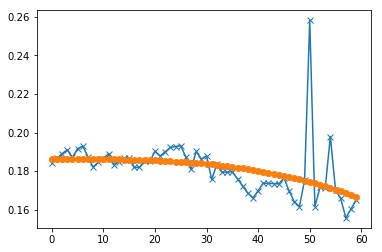

In [86]:
x, y = get_rows_and_indexes()
model1 = make_pipeline(PolynomialFeatures(3), Lasso())
model1.fit(x, y)
plt.plot(y, '-x')
plt.plot(model1.predict(x), '-o')

/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


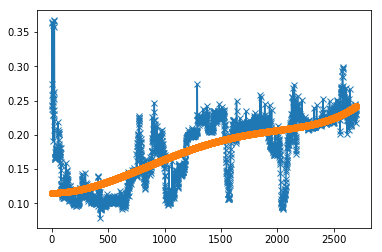

In [96]:
x, y = get_columns_and_indexes()
model1 = make_pipeline(PolynomialFeatures(5), Lasso())
model1.fit(x, y)
plt.plot(y, '-x')
plt.plot(model1.predict(x), '-o')

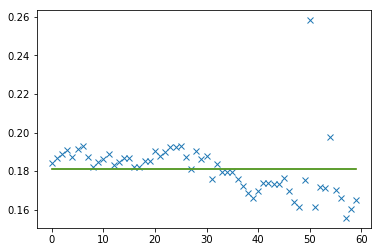

In [97]:
X, y = get_rows_and_indexes()
reg1 = LassoLarsIC(criterion='bic', positive=True)
reg2 = Lasso()
reg1.fit(X,y)
reg2.fit(X,y)
plt.plot(y, 'x')
plt.plot(reg1.predict(X))
plt.plot(reg2.predict(X))

In [98]:
def fit_model(poly=3, model=Lasso(), y = hsp.data[120, 0:1, 3:-1].flatten(), x = np.arange(60)):
    model1 = make_pipeline(PolynomialFeatures(poly), model)
    model1.fit(x[:, np.newaxis], y)
    plt.plot(y, '-x')
    plt.plot(model1.predict(x[:, np.newaxis]), '-o')
    plt.title(f'Poly {poly}, model:{model}')

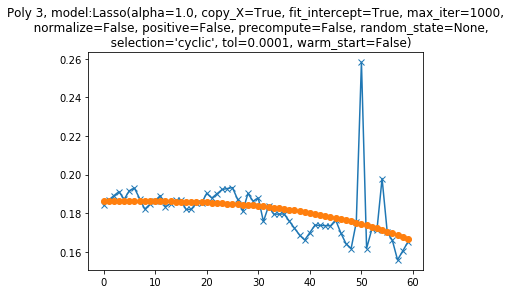

In [99]:
fit_model()

# using SVR

In [100]:
xx, xy = np.meshgrid(range(1),range(60))
xxxy = np.array([xx.flatten(),xy.flatten()]).T

In [101]:
xxxy.shape

(60, 2)

In [102]:
y = hsp.data[120, 0:1, 3:-1].flatten()
y

array([0.18433517, 0.18676871, 0.1890386 , 0.19113635, 0.18713726,
       0.19161275, 0.19300675, 0.18754537, 0.18210506, 0.18460359,
       0.18642941, 0.18907677, 0.18332337, 0.1849632 , 0.18660304,
       0.18697132, 0.18190537, 0.18200965, 0.1853128 , 0.18512815,
       0.19025508, 0.1878466 , 0.19006124, 0.19227593, 0.19275387,
       0.19323736, 0.18712652, 0.1810848 , 0.1902059 , 0.18618834,
       0.18786706, 0.17570291, 0.18368733, 0.1794847 , 0.17950848,
       0.17958993, 0.17593499, 0.17228007, 0.16862515, 0.16606244,
       0.16992317, 0.17380455, 0.17367418, 0.17354383, 0.17341349,
       0.17649469, 0.16975133, 0.16420522, 0.16164374, 0.17523946,
       0.25821707, 0.16167982, 0.17157087, 0.17114484, 0.19796073,
       0.1702205 , 0.16583835, 0.15576279, 0.16037534, 0.16498788],
      dtype=float32)

In [103]:
y.shape

(60,)

In [104]:
clf = svm.SVR(C=100, epsilon=.01, kernel='rbf')
clf.fit(xxxy, y)

/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
clf.n_support_ 

array([1431655765, 1081538645], dtype=int32)

In [106]:
clf.support_vectors_

array([[ 0.,  3.],
       [ 0.,  6.],
       [ 0., 20.],
       [ 0., 23.],
       [ 0., 25.],
       [ 0., 28.],
       [ 0., 39.],
       [ 0., 47.],
       [ 0., 48.],
       [ 0., 49.],
       [ 0., 50.],
       [ 0., 51.],
       [ 0., 52.],
       [ 0., 53.],
       [ 0., 54.],
       [ 0., 55.],
       [ 0., 57.],
       [ 0., 59.]])

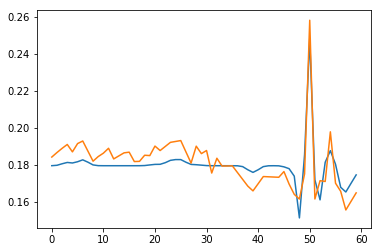

In [107]:
plt.plot(clf.predict(xxxy))
plt.plot(y)

In [108]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [109]:
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
kr.fit(xxxy, y)
svr = GridSearchCV(svm.SVR(kernel='rbf', gamma=0.1, max_iter=5000), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3, 1e4],
                               "epsilon": np.linspace(0.0001,1,num=20)})
svr.fit(xxxy, y)

/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxSca

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=5000, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 10.0, 100.0, 1000.0, 10000.0], 'epsilon': array([1.00000e-04, 5.27263e-02, 1.05353e-01, 1.57979e-01, 2.10605e-01,
       2.63232e-01, 3.15858e-01, 3.68484e-01, 4.21111e-01, 4.73737e-01,
       5.26363e-01, 5.78989e-01, 6.31616e-01, 6.84242e-01, 7.36868e-01,
       7.89495e-01, 8.42121e-01, 8.94747e-01, 9.47374e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
kr.best_params_

{'alpha': 0.01, 'gamma': 0.01}

In [149]:
svr.best_params_

{'C': 1.0, 'epsilon': 0.0001}

0.33712688598087753 0.4612574652539411


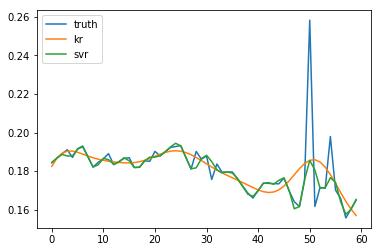

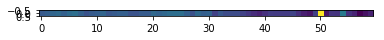

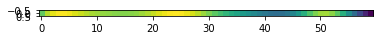

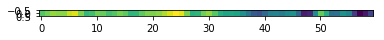

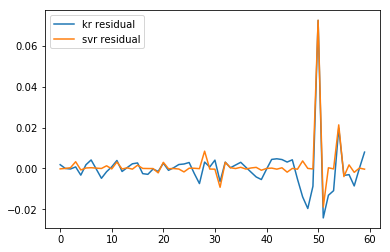

In [123]:
print(kr.score(xxxy,y), svr.score(xxxy,y))
plt.plot(y, label='truth')
plt.plot(kr.predict(xxxy), label='kr')
plt.plot(svr.predict(xxxy), label='svr')
plt.legend()
plt.show()
plt.imshow(y.reshape((1,60)))
plt.show()
plt.imshow(kr.predict(xxxy).reshape((1,60)))
plt.show()
plt.imshow(svr.predict(xxxy).reshape((1,60)))
plt.show()
plt.plot(y-kr.predict(xxxy), label='kr residual')
plt.plot(y-svr.predict(xxxy), label='svr residual')
plt.legend()
plt.show()

wow so the SVR on a single band works pretty well, it keeps most of the spatial infomation and rejects the large spikes

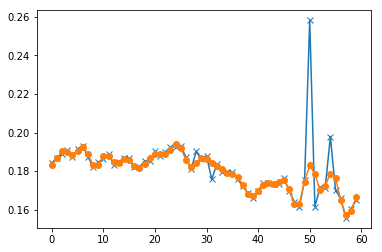

In [156]:
x, y = get_rows_and_indexes()
model1 = make_pipeline(svm.SVR(kernel='rbf', gamma=0.1, epsilon=0.001, max_iter=5000))
model1.fit(x, y)
plt.plot(y, '-x')
plt.plot(model1.predict(x), '-o')

In [198]:
x, y = get_rows_and_indexes()

In [199]:
x.shape

(60, 1)

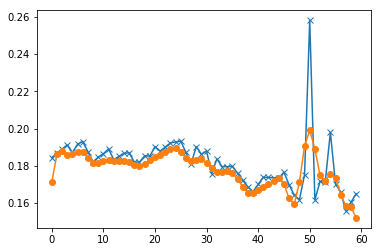

In [175]:
x, y = get_rows_and_indexes()
model1 = make_pipeline(KernelRidge(kernel='rbf', gamma=0.1, alpha=0.1))
model1.fit(x, y)
plt.plot(y, '-x')
plt.plot(model1.predict(x), '-o')

/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


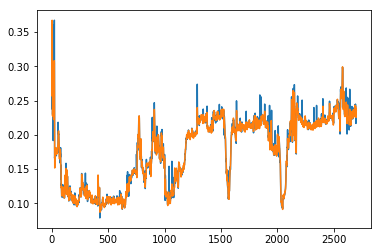

In [172]:
x, y = get_columns_and_indexes()
model1 = make_pipeline(svm.SVR(kernel='rbf', gamma=0.1, epsilon=0.001, max_iter=5000))
model1.fit(x, y)
plt.plot(y, '-')
plt.plot(model1.predict(x), '-')

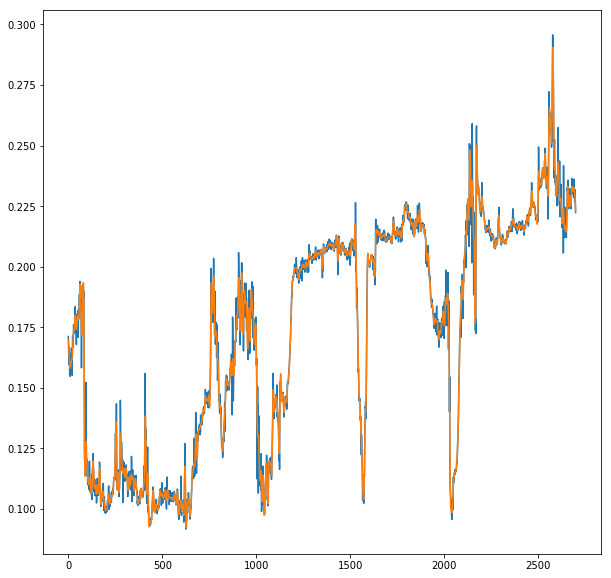

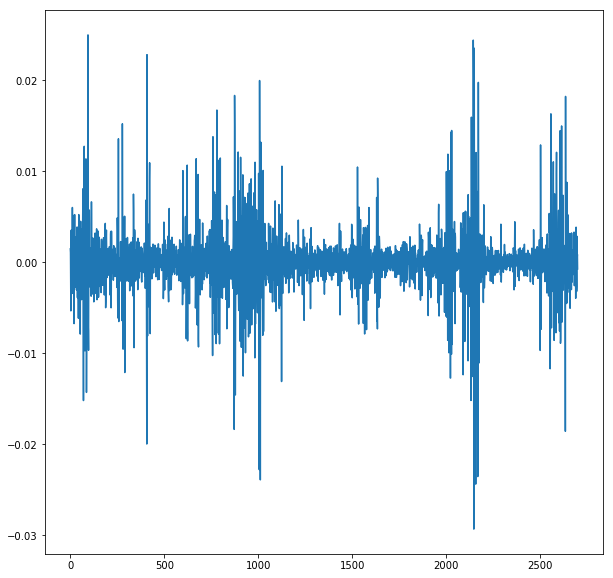

In [376]:
x, y = get_columns_and_indexes()
model1 = make_pipeline(KernelRidge(kernel='rbf', gamma=.01, alpha=0.001))
model1.fit(x, y)
plt.plot(y, '-')
p = model1.predict(x)
plt.plot(p, '-')
plt.show()
plt.plot(y-p)
plt.show()

# attempt svr on full band row by row

In [ ]:
def get_rows_and_indexes(rows=slice(0,1), band=120):
    d = hsp.data[band,rows,3:-1]
    rows, cols = d.shape
    x = np.arange(cols)
    X = np.tile(x, rows)
    return X.reshape(-1, 1), d.flatten()

In [202]:
[x.shape for x in get_rows_and_indexes(rows=(l,l+1))]

[(120, 1), (120,)]

In [343]:
f = []
for l in range(0,300):
    x, y = get_rows_and_indexes(rows=slice(l,l+1), band=120)
    model1 = make_pipeline(KernelRidge(kernel='rbf', gamma=0.05, alpha=0.1))
    #model1 = make_pipeline(svm.SVR(kernel='rbf', gamma=0.1, epsilon=0.0001, max_iter=5000))
    model1.fit(x, y)
    p = model1.predict(x)
    f.append(p)

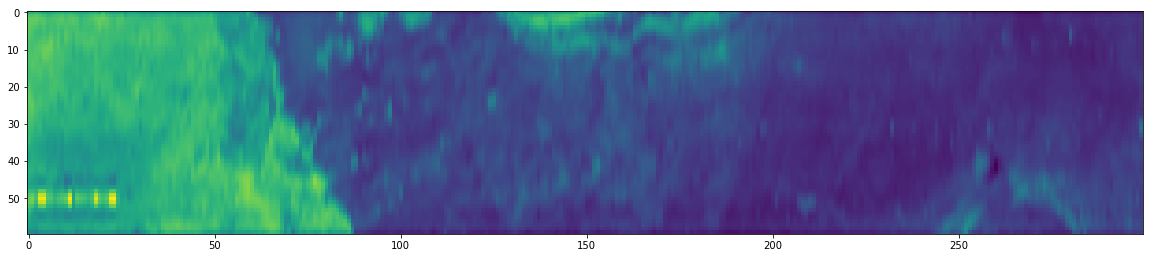

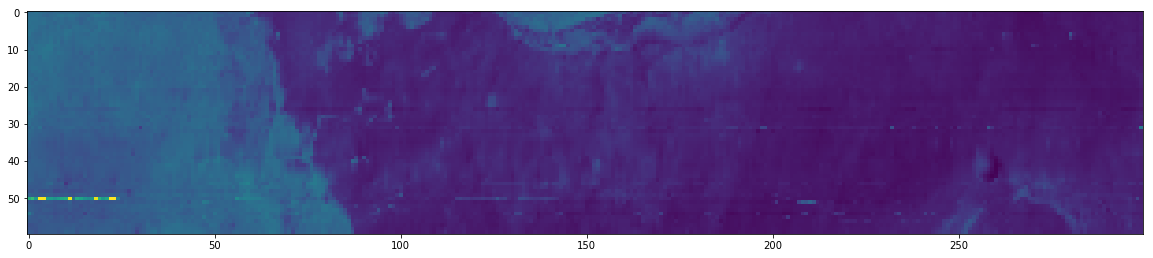

In [344]:
plt.figure(figsize=(20,20))
plt.imshow(np.vstack(f).T)
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(hsp.data[120, 0:300,3:-1].T)
plt.show()

In [284]:
slice(0,10).stop

10

In [289]:
hsp.samples

64

In [292]:
def run_model_rows(rows=slice(0,300), band=120, model=svm.SVR(kernel='rbf', gamma=0.01, epsilon=0.0001, max_iter=5000)):
    f = []
    for l in range(rows.start, rows.stop):
        x, y = get_rows_and_indexes(rows=slice(l,l+1), band=band)
        #model = make_pipeline(model)
        model.fit(x, y)
        p = model.predict(x)
        f.append(p)
    plt.figure(figsize=(20,20))
    plt.imshow(np.vstack(f).T)
    plt.title(f'model {model}')
    plt.show()
    plt.figure(figsize=(20,20))
    plt.imshow(hsp.data[band, 0:300,3:-1].T)
    plt.title(f'raw band {band}')
    plt.show()

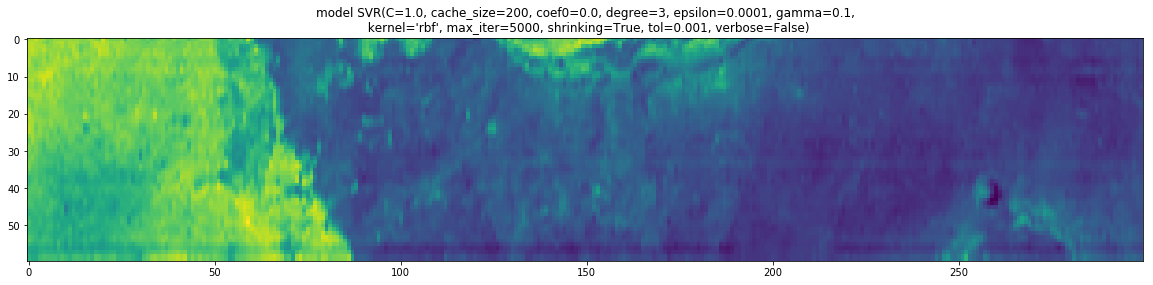

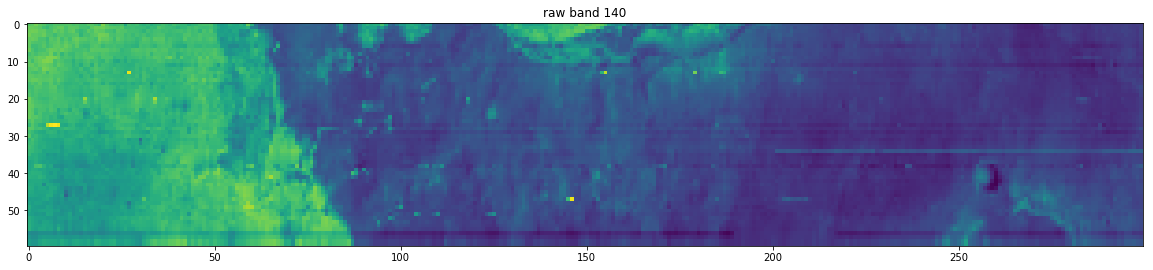

In [295]:
run_model_rows(band=140)

In [345]:
?get_columns_and_indexes

In [391]:
def run_model_cols(cols=slice(0,59), rows=slice(0,300), band=120, model=svm.SVR(kernel='rbf', gamma=0.001, epsilon=0.001, max_iter=5000)):
    #d = hsp.data[band, rows, 3:-1]
    f = []
    for l in range(cols.start, cols.stop):
        x, y = get_columns_and_indexes(columns=slice(l,l+1), band=band)
        x = x[0:300]
        y = y[0:300]
        #model = make_pipeline(model)
        model.fit(x, y)
        p = model.predict(x)
        f.append(p)
    plt.figure(figsize=(20,20))
    plt.imshow(np.vstack(f))
    plt.title(f'model {model}')
    plt.show()
    plt.figure(figsize=(20,20))
    plt.imshow(hsp.data[band, 0:300,3:-1].T)
    plt.title(f'raw band {band}')
    plt.show()

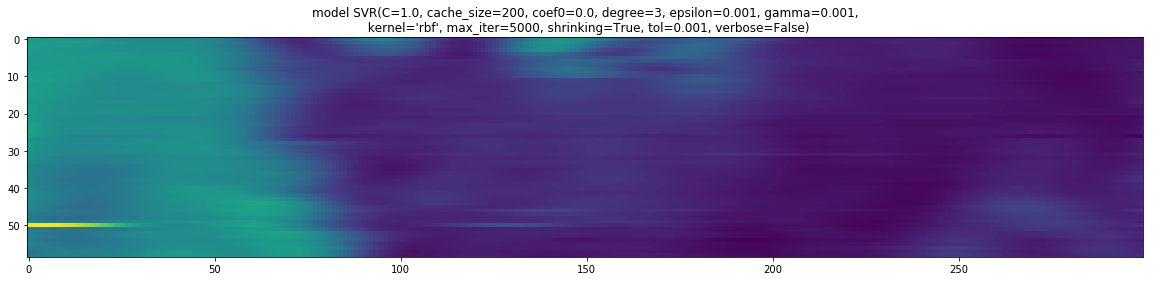

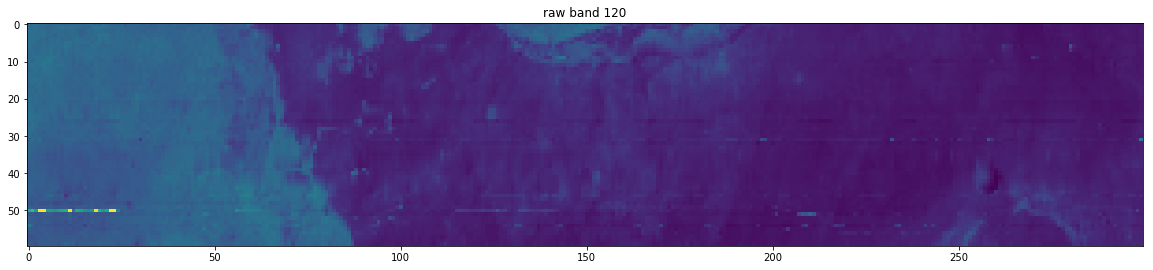

In [392]:
run_model_cols()

# use band space

In [314]:
plt.rcParams['figure.figsize'] = [10, 10]
utils.plot_widget_Gray(hsp, 120, x=slice(0,3),y=slice(3,6), use_selector=True)

interactive(children=(BoundedIntText(value=120, description='R', max=154), Output()), _dom_classes=('widget-in…

(150, 9)


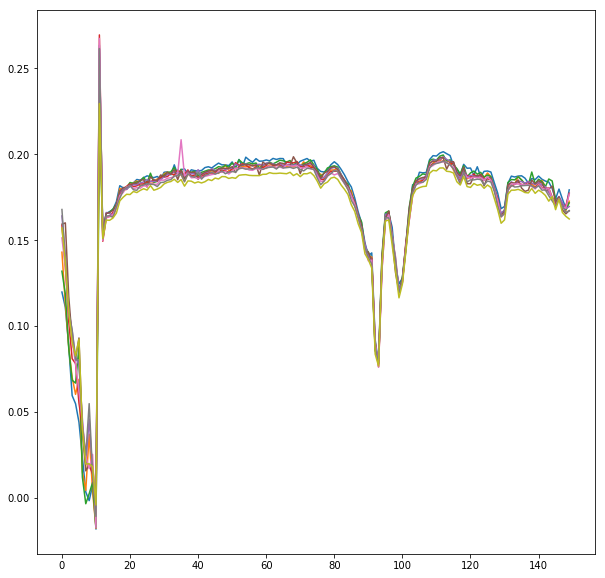

In [297]:
d = hsp[4:,slice(0,3),slice(3,6)].reshape(150,9)
plt.plot(d)


In [315]:
print(d.shape)
X = np.repeat(np.arange(0,150), 9)[:,np.newaxis]
y = d.flatten()
X.shape, y.shape

(150, 9)


((1350, 1), (1350,))

/Users/andrew/anaconda3/envs/crismy/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


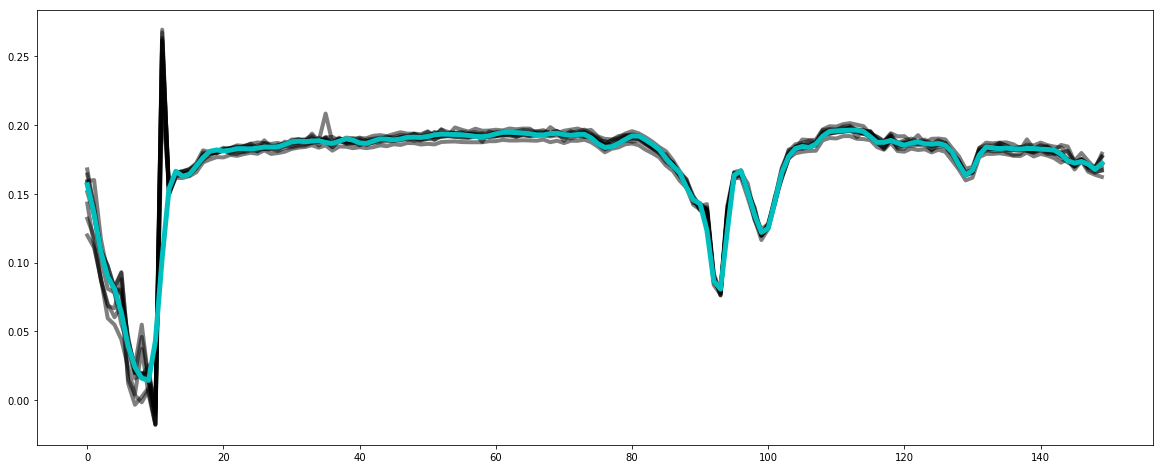

0.8735342133823232


In [337]:
svr = svm.SVR(kernel='rbf', gamma=.1, epsilon=0.00001, max_iter=5000)
svr.fit(X, y)
plt.figure(figsize=(20,8))
plt.plot(d, alpha=0.5, c='k',lw=4)
plt.plot(svr.predict(np.arange(150).reshape(-1, 1)), c='c', lw=5)
plt.show()
print(svr.score(X, y))

In [338]:
data.shape

NameError: name 'data' is not defined

In [ ]:
def apply_band_wise(rows=slice(0,300), model = svm.SVR(kernel='rbf', gamma=0.5, epsilon=0.0001, max_iter=5000)):
    data = hsp.data[:, rows, 3:-1]
    f = []
    #d = hsp[4:,slice(0,3),slice(3,6)].reshape(150,9)
    for r
    
    for l in range(rows.start, rows.stop):
        x, y = get_rows_and_indexes(rows=slice(l,l+1), band=band)
        #model = make_pipeline(model)
        model.fit(x, y)
        p = model.predict(x)
        f.append(p)
    plt.figure(figsize=(20,20))
    plt.imshow(np.vstack(f).T)
    plt.title(f'model {model}')
    plt.show()
    plt.figure(figsize=(20,20))
    plt.imshow(hsp.data[band, 0:300,3:-1].T)
    plt.title(f'raw band {band}')
    plt.show()